## Tyrinėjame regresijos problemas

- Pamėginsime patyrinėti regresijos problemas, apmokyti pirmąjį supervised learning modelį

- Regresija nenaudojant specialių bibliotekų išvestinėms

- Regresija su keras

In [1]:
#Įsikeliame reikalingas bibliotekas


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

import cv2

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
#Susikuriame duomenų eksperimentams

x=np.linspace(0,1,100)
y=0.5*x+0.1*np.random.randn(100)+0.2


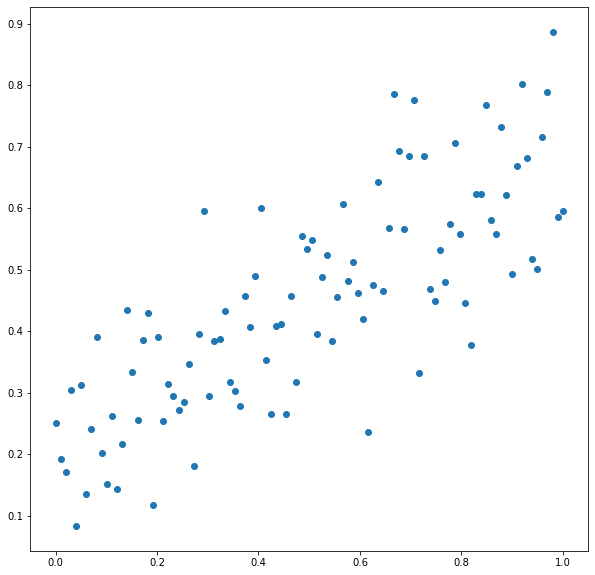

In [3]:
plt.scatter(x, y)
#plt.plot(x, 0.5*x+0.2, '-r')

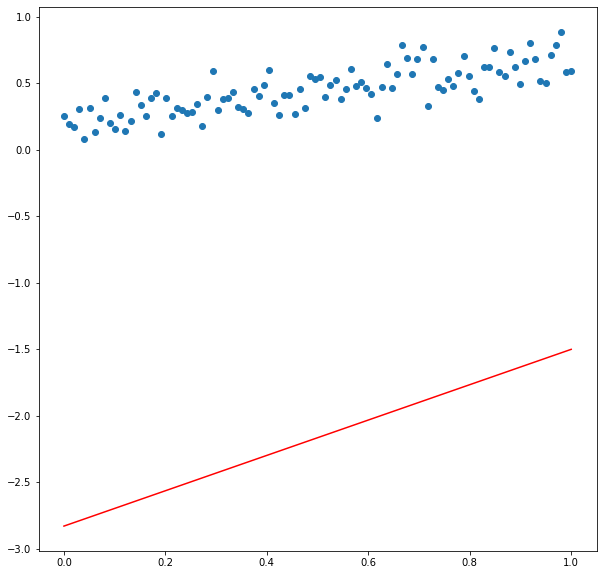

In [4]:
# Sukuriame kintamuosius svoriams, priskiriame jiems atsitiktines reikšmes

m, b = np.random.randn(2)

plt.scatter(x, y)

plt.plot(x, m*x+b, '-r')

Epoch: 0, Loss: 3.45322098475396
Epoch: 10, Loss: 0.3640846662891406
Epoch: 20, Loss: 0.14262493690216613
Epoch: 30, Loss: 0.11368889056942859
Epoch: 40, Loss: 0.09933150076738301
Epoch: 50, Loss: 0.08750796045593341
Epoch: 60, Loss: 0.07722115256671974
Epoch: 70, Loss: 0.06823257319146707
Epoch: 80, Loss: 0.060375794364073726
Epoch: 90, Loss: 0.05350813305407892
Epoch: 100, Loss: 0.04750505435960406
Epoch: 110, Loss: 0.042257713613703556
Epoch: 120, Loss: 0.03767096960993814
Epoch: 130, Loss: 0.033661658686100625
Epoch: 140, Loss: 0.03015708679985055
Epoch: 150, Loss: 0.02709371148691827
Epoch: 160, Loss: 0.024415989753001237
Epoch: 170, Loss: 0.022075371006737197
Epoch: 180, Loss: 0.0200294167740886
Epoch: 190, Loss: 0.018241031233395984
Epoch: 200, Loss: 0.016677788619694864
Epoch: 210, Loss: 0.015311345303258386
Epoch: 220, Loss: 0.014116925882581732
Epoch: 230, Loss: 0.013072873974003456
Epoch: 240, Loss: 0.01216025955319269
Epoch: 250, Loss: 0.011362535729090961
Epoch: 260, Loss:

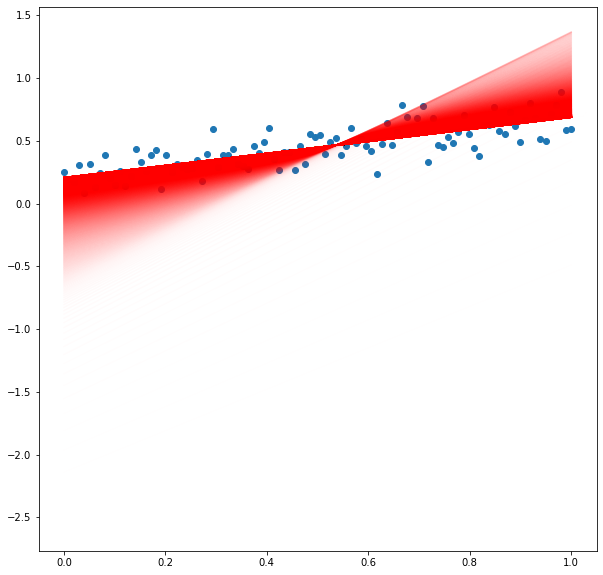

In [5]:
# Mokome 


#nustatome learning rate
lr = 0.1


plt.scatter(x, y)
plt.plot(x, 0.5*x+0.2, '-y')
#plt.plot(x, m*x+b, '-r')


#Loss funkcija
def mse(y, y_pred):
    return (np.square(y - y_pred)).mean(axis=0)*0.5


#mokymas
for epoch in range(1000): #Mokymas truks 1000 epochų
    
    y_pred = m*x+b #Atliekame spėjimus
    
    loss = mse(y, y_pred) #paskaičiuojame loss funkcijos reikšmes
    
    
    #Atnaujiname parametrus
    m = m + lr*x.dot(y - y_pred)/100.
    b = b + lr*(y - y_pred).mean(axis=0)
    
    
    plt.plot(x, m*x+b, color = (1, 0, 0, epoch/1000))
    if epoch%10 ==0:
        print('Epoch: {}, Loss: {}'.format(epoch,loss))

In [ ]:
# Atvaizduojame išmoktą funkciją

plt.scatter(x, y)
plt.plot(x, 0.5*x+0.2, '-y')
plt.plot(x, m*x+b, '-r')

In [ ]:
print("m: {}, b: {}".format(m, b))

## KERAS REGRESIJA

In [1]:
import tensorflow.keras

ImportError: Traceback (most recent call last):
  File "C:\Users\daini\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\daini\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\daini\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\daini\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\daini\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
#sukonstruojame modelį

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=1))

model.compile(loss='mse', optimizer='sgd')


In [ ]:
model.summary()

In [ ]:
# Mokome
model.fit(x, y, epochs=1000)

In [ ]:
m_keras = model.weights[0].numpy()[0]
b_keras = model.weights[1].numpy()[0]

In [ ]:
#Palyginkim funkcijas:

plt.scatter(x, y)
plt.plot(x, 0.5*x+0.2, '-y')
plt.plot(x, m*x+b, '-r')
plt.plot(x, m_keras*x+b_keras, '-g')

In [ ]:
#Galime susikurti taškus su daugiau savybių

x=np.linspace(0,1,100)
y=np.linspace(0,1,100)

z=0.5*x+0.1*np.random.randn(100)+0.3*y+0.15*np.random.randn(100)+0.34

In [ ]:
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z)



In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=2))

model.compile(loss='mse', optimizer='sgd')

model.summary()

In [ ]:
a = np.dstack((x, y)).reshape((100,2))
print(a.shape)

In [ ]:
model.fit(a, z, epochs=200)

## Užduotis

- Naudodami pateiktą duomenų rinkinį, sukurkite modelį, nuspėjantį studento pažymį pagal tai, kiek laiko jis praleido mokydamasis.




In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('student_scores.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
plt.scatter(X_train, y_train)